In [1]:
"""
A simple selenium test example written by python
"""
%matplotlib inline
import unittest
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import matplotlib.pyplot as plt
import time
import random
class TestTemplate(unittest.TestCase):
    """Include test cases on a given url"""

    def setUp(self):
        """Start web driver"""
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--disable-gpu')
        self.driver = webdriver.Chrome(chrome_options=chrome_options)
        self.driver.implicitly_wait(10)

    def tearDown(self):
        """Stop web driver"""
        self.driver.quit()

    def login(self,url="https://annotator-dev.agri-net.org.il/#"):
        """
        log in
        load first image with annotations
        """
        try:
            #go to site
            driver = self.driver
            driver.get(url)
            try:
                driver.find_element_by_link_text("logout amits").click()               
            except NoSuchElementException as ex:
                pass
            driver.find_element_by_id("username").clear()
            driver.find_element_by_id("username").send_keys("amits")
            driver.find_element_by_id("password").clear()
            driver.find_element_by_id("password").send_keys("2wsx2wsx")   
            driver.find_element_by_xpath('/html/body/maintag/navbar/nav/h4/loginbox/div[1]/div[3]/a').click() 

        except NoSuchElementException as ex:
            self.fail(ex.msg) 

    # def test_case_1(self):
    #     """
    #     log in
    #     load first image with annotations
    #     """
    #     try:
    #         self.login()
    #         driver = self.driver
    #         driver.find_element_by_link_text("test1").click()
    #         time.sleep(40)

            
    #         #locate image  
    #         canvas=driver.find_element_by_id("main_img_canvas")    
    #         canvas.screenshot('wrks/selenium_docker/test1_first_image_test.png')
    #         assert open("wrks/selenium_docker/test1_first_image_test.png","rb").read() == open("wrks/selenium_docker/test1_first_image.png","rb").read()

    #         #draw new cirlce
    #         #find circle button
    #         driver.find_element_by_xpath('//*[@id="object_drawing_circle_div"]/span').click()  

    #         #locate image  
    #         canvas=driver.find_element_by_id("main_img_canvas")    


    #         #action sequence
    #         actions = ActionChains(self.driver)

    #         actions.move_to_element(canvas)
    #         actions.move_by_offset(100,-80) 
    #         actions.click_and_hold()
    #         actions.move_by_offset(0,20)   
    #         actions.release()
    #         actions.perform()     
    #         canvas.screenshot('wrks/selenium_docker/test1_new_circ_test.png')
    #         assert open("wrks/selenium_docker/test1_new_circ.png","rb").read() == open("wrks/selenium_docker/test1_new_circ_test.png","rb").read()
    #         #delete circle
    #         driver.find_element_by_xpath('//*[@id="edit_box"]/div[1]/i').click() 

    #         canvas.screenshot('wrks/selenium_docker/test1_first_image_after_delete_test.png')
    #         assert open("wrks/selenium_docker/test1_first_image_after_delete.png","rb").read() == open("wrks/selenium_docker/test1_first_image_after_delete_test.png","rb").read()            
    #     except NoSuchElementException as ex:
    #         self.fail(ex.msg)   

    def test_case_2(self):
        """
        load new image, annotate, check, delete ,check again
        """
        try:
            #go to site
            self.login()            
            driver = self.driver
            driver.find_element_by_link_text("test1").click()
            element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, '4493')))

            driver.find_element_by_id("4493").click()
            time.sleep(10)
            driver.find_element_by_id("4493").click()
            time.sleep(40)
            #element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="object_drawing_circle_div"]/span')))
              



            #draw circle
            #find circle button
            driver.find_element_by_xpath('//*[@id="object_drawing_circle_div"]/span').click()  

            #locate image  
            canvas=driver.find_element_by_id("main_img_canvas")    


            #action sequence
            actions = ActionChains(self.driver)

            actions.move_to_element(canvas)
            actions.move_by_offset(50,0) 
            actions.click_and_hold()
            actions.move_by_offset(0,20)   
            actions.release()
            actions.perform()


            #draw rectangle
            #find rectangle button
            driver.find_element_by_xpath('//*[@id="object_drawing_rectangle_div"]/span').click()  

            #locate image  
            canvas=driver.find_element_by_id("main_img_canvas")    


            #action sequence
            actions = ActionChains(self.driver)

            actions.move_to_element(canvas)
            actions.move_by_offset(-50,0) 
            actions.click_and_hold()
            actions.move_by_offset(20,-20)   
            actions.release()
            actions.perform()  


            #draw ploygon
            #find rectangle button
            driver.find_element_by_xpath('//*[@id="polygons_draw_div"]/span').click()  

            #locate image  
            canvas=driver.find_element_by_id("main_img_canvas")    


            #action sequence
            actions = ActionChains(self.driver)

            actions.move_to_element(canvas)
            actions.move_by_offset(0,-80) 
            actions.click_and_hold()
            for i in range(8):
                actions.move_by_offset(10,10)
                time.sleep(1)           
            actions.move_by_offset(-50,-50)
            time.sleep(1)  
            actions.release()
            actions.move_to_element(canvas)
            actions.move_by_offset(0,-80)             
            actions.click()
            actions.perform()             
            time.sleep(10)            
            canvas.screenshot('wrks/test2.png')
            assert open("wrks/test2_test.png","rb").read() == open("wrks/test2.png","rb").read()
        except NoSuchElementException as ex:
            self.fail(ex.msg) 

In [20]:
#set up an handle for testing 
a=TestTemplate()
a.setUp()
a.login()

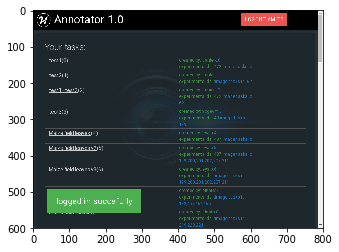

In [21]:

login='test_login.png'
a.driver.save_screenshot(login)
plt.imshow(plt.imread(login))

In [130]:
# a.driver.find_element_by_link_text("test1").click()
# element = WebDriverWait(a.driver, 40).until(EC.presence_of_element_located((By.ID, '4494')))

a.driver.find_element_by_id("4495").click()

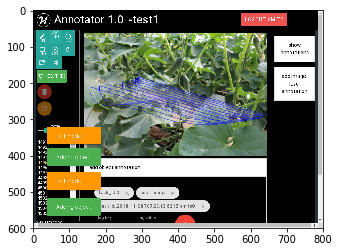

In [133]:
img_sel='test_image_selection.png'
a.driver.save_screenshot(img_sel)
plt.imshow(plt.imread(img_sel))

In [132]:


def draw_(offset,times=10):
    '''
    function to draw a human mouse movement polygon on the annotation system
    use by:
    off=np.array([-100,-50])
    draw_(off)
    
    '''
    #define human mouse movments
    import numpy as np
    import scipy.interpolate as si

    #curve base
    points = [[0, 0], [0, 2], [2, 3], [4, 0], [6, 3], [8, 2], [8, 0]]; #curve base
    points = np.array(points)

    x = points[:,0]
    y = points[:,1]


    t = range(len(points))
    ipl_t = np.linspace(0.0, len(points) - 1, 100)

    x_tup = si.splrep(t, x, k=3)
    y_tup = si.splrep(t, y, k=3)

    x_list = list(x_tup)
    xl = x.tolist()
    x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

    y_list = list(y_tup)
    yl = y.tolist()
    y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]

    x_i = si.splev(ipl_t, x_list) #x interolate values
    y_i = si.splev(ipl_t, y_list) #y_interpolate values    
    
    
    
    #localte polygon button
    poly=a.driver.find_element_by_xpath('//*[@id="polygons_draw_div"]/span') 
    #locate image  
    canvas=a.driver.find_element_by_id("main_img_canvas")     
    actions = ActionChains(a.driver)    
    actions.click(poly)    
    for i in range(times):
        offset=offset-[3*i,-3]       

        actions.move_to_element(canvas)
        actions.move_by_offset(offset[0],offset[1])
        actions.click_and_hold()
        for mouse_x, mouse_y in zip(x_i, y_i):
            actions.move_by_offset(mouse_x,mouse_y)
        actions.release()
        actions.move_to_element(canvas)
        actions.move_by_offset(offset[0],offset[1])
        actions.click()      
        actions.click(poly)   
#         actions.move_by_offset(100,100)
#         actions.double_click()
    actions.perform()

    


off=np.array([-100,-50])
draw_(off)




0
1
2
3
4
5
6
7
8
9


In [19]:
draw_(off-[5*5,0])
# for i in range(5):
#     actions.move_by_offset(-4,-4)
#     time.sleep(0.5)
# for i in range(5):
#     actions.move_by_offset(2,2)
#     time.sleep(0.5)
# actions.release()
# actions.move_to_element(canvas)
# actions.click()
# a.driver.save_screenshot('test_actions.png')

[-125  -50]


In [20]:
draw='test_draw.png'
a.driver.save_screenshot(draw)
a.driver.save_screenshot(draw)
plt.imshow(plt.imread(draw))

In [116]:
a.tearDown()